In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from konlpy.tag import Mecab,Okt
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

In [2]:
# 데이터 불러오기
data = pd.read_csv('train.csv')
data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [3]:
# class 열을 숫자로 변환
encoder = LabelEncoder()
data['class'] = encoder.fit_transform(data['class'])

In [4]:
# konlpy의 Mecab을 이용한 토큰화
mecab = Okt()
data['conversation'] = data['conversation'].apply(mecab.morphs)

In [5]:
data.head()

,idx,class,conversation
0,0,3,"[지금, 너, 스스로, 를, 죽여, 달라, 고, 애원, 하는, 것, 인가, ?, \..."
1,1,3,"[길동, 경찰서, 입니다, ., \n, 9시, 40분, 마트, 에, 폭발물, 을, ..."
2,2,1,"[너, 되게, 귀여운거, 알, 지, ?, 나, 보다, 작은, 남자, 는, 첨, 봤어..."
3,3,0,"[어이, 거기, \n, 예, ??, \n, 너, 말, 이야, 너, ., 이리, 오라..."
4,4,0,"[저기, 요, 혹시, 날, 이, 너무, 뜨겁잖아요, ?, 저희, 회사, 에서, 이,..."


In [6]:
# 케라스를 이용한 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['conversation'])

sequences = tokenizer.texts_to_sequences(data['conversation'])

In [7]:
# 입력 데이터 패딩 처리
data_pad = pad_sequences(sequences)

In [8]:
# 데이터셋 분리
X_train, X_val, y_train, y_val = train_test_split(data_pad, data['class'], test_size=0.1, random_state=42)

In [9]:
# MLP 모델 생성
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 128, input_length=data_pad.shape[1]))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(data['class'].unique()), activation='softmax'))

In [10]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
112/112 [==============================] - 3s 7ms/step - loss: 1.3340 - accuracy: 0.3890 - val_loss: 1.0919 - val_accuracy: 0.5544
Epoch 2/10
112/112 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.8459 - val_loss: 0.5531 - val_accuracy: 0.7823
Epoch 3/10
112/112 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9935 - val_loss: 0.4601 - val_accuracy: 0.8203
Epoch 4/10
112/112 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9997 - val_loss: 0.4302 - val_accuracy: 0.8405
Epoch 5/10
112/112 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4226 - val_accuracy: 0.8430
Epoch 6/10
112/112 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4294 - val_accuracy: 0.8456
Epoch 7/10
112/112 [==============================] - 0s 4ms/step - loss: 7.4540e-04 - accuracy: 1.0000 - val_loss: 0.4304 - val_accuracy: 0.8329
Ep

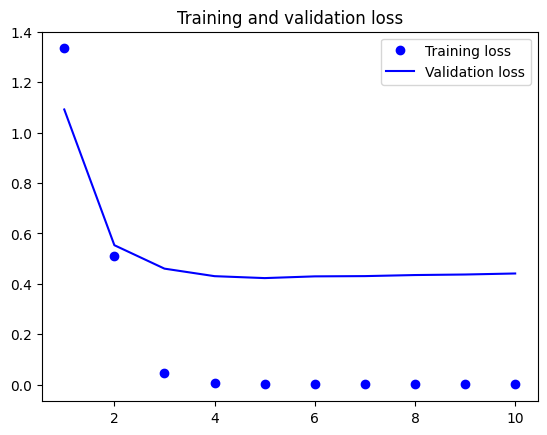

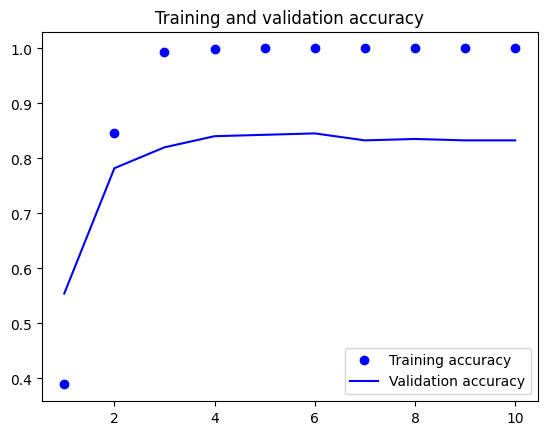

In [12]:
import matplotlib.pyplot as plt

# 시각화를 위한 데이터 정의
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

# 손실값 시각화
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 정확도 시각화
plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()


In [13]:
test_x = '''우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때?
네? 제가요?
그렇지? 2달만 파견 잘 갔다오면 승진이야.
네? 저는 별로 가고 싶지 않습니다.
여기 있는 모든사람도 가기 싫어해. 그러니까 막내인 영지씨가 가는게 맞지
정말 죄송합니다. 저는 못갑니다.
장난해? 모두를 위해 영지씨가 희생하는게 싫어?
네. 부당한 방법으로 가는 것 같습니다.
영지씨 안가면 회사생활 오래 못할 것 같은데 그래도 안갈거야? 안가면 지옥일텐데.
그래도 이 방법은 아닌 것 같습니다. 죄송합니다.'''

test_y = encoder.transform(["직장 내 괴롭힘 대화"])

In [14]:
data = {
    "class": [test_y, ],
    "conversation": [test_x, ],
}

df = pd.DataFrame(data, index=[0])




In [15]:
# 테스트 데이터 전처리
df['conversation'] = df['conversation'].apply(mecab.morphs)
test_sequences = tokenizer.texts_to_sequences(df['conversation'])
test_pad = pad_sequences(test_sequences, maxlen=data_pad.shape[1])

# 예측 수행
predictions = model.predict(test_pad)


1/1 [==============================] - 0s 52ms/step


In [16]:
predicted_classes = np.argmax(predictions, axis=1)

In [17]:
predicted_labels = encoder.inverse_transform(predicted_classes)

In [18]:
predicted_labels

array(['직장 내 괴롭힘 대화'], dtype=object)